In [18]:
import pandas as pd 
pd.set_option('display.max_columns', None)

import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Import the dataset

In [2]:
data_path = "../dataset/regularite-mensuelle-tgv-aqst.csv" 
df_base = pd.read_csv(data_path, sep=",")
df_base.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,commentaires_retard_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,28.436735,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,21.524020,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,55.692308,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,48.623077,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,12.405164,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


## Analyse des causes de retard

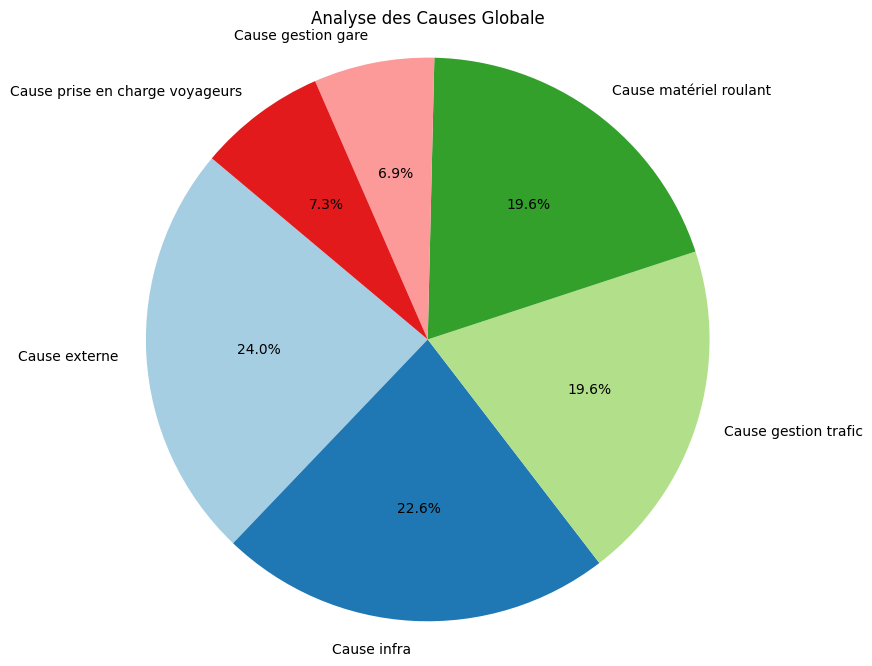

In [39]:
# Données pour le pie chart
causes = ["Cause externe", "Cause infra", "Cause gestion trafic", "Cause matériel roulant", "Cause gestion gare", "Cause prise en charge voyageurs"]
prct_causes = df_base[["prct_cause_externe", "prct_cause_infra", "prct_cause_gestion_trafic", "prct_cause_materiel_roulant", "prct_cause_gestion_gare", "prct_cause_prise_en_charge_voyageurs"]].mean()

# Créer un pie chart
plt.figure(figsize=(8, 8))
plt.pie(prct_causes, labels=causes, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(causes))))

# Titre
plt.title("Analyse des Causes Globale")

plt.axis('equal')  # Assurez-vous que le pie chart est un cercle.

plt.show()


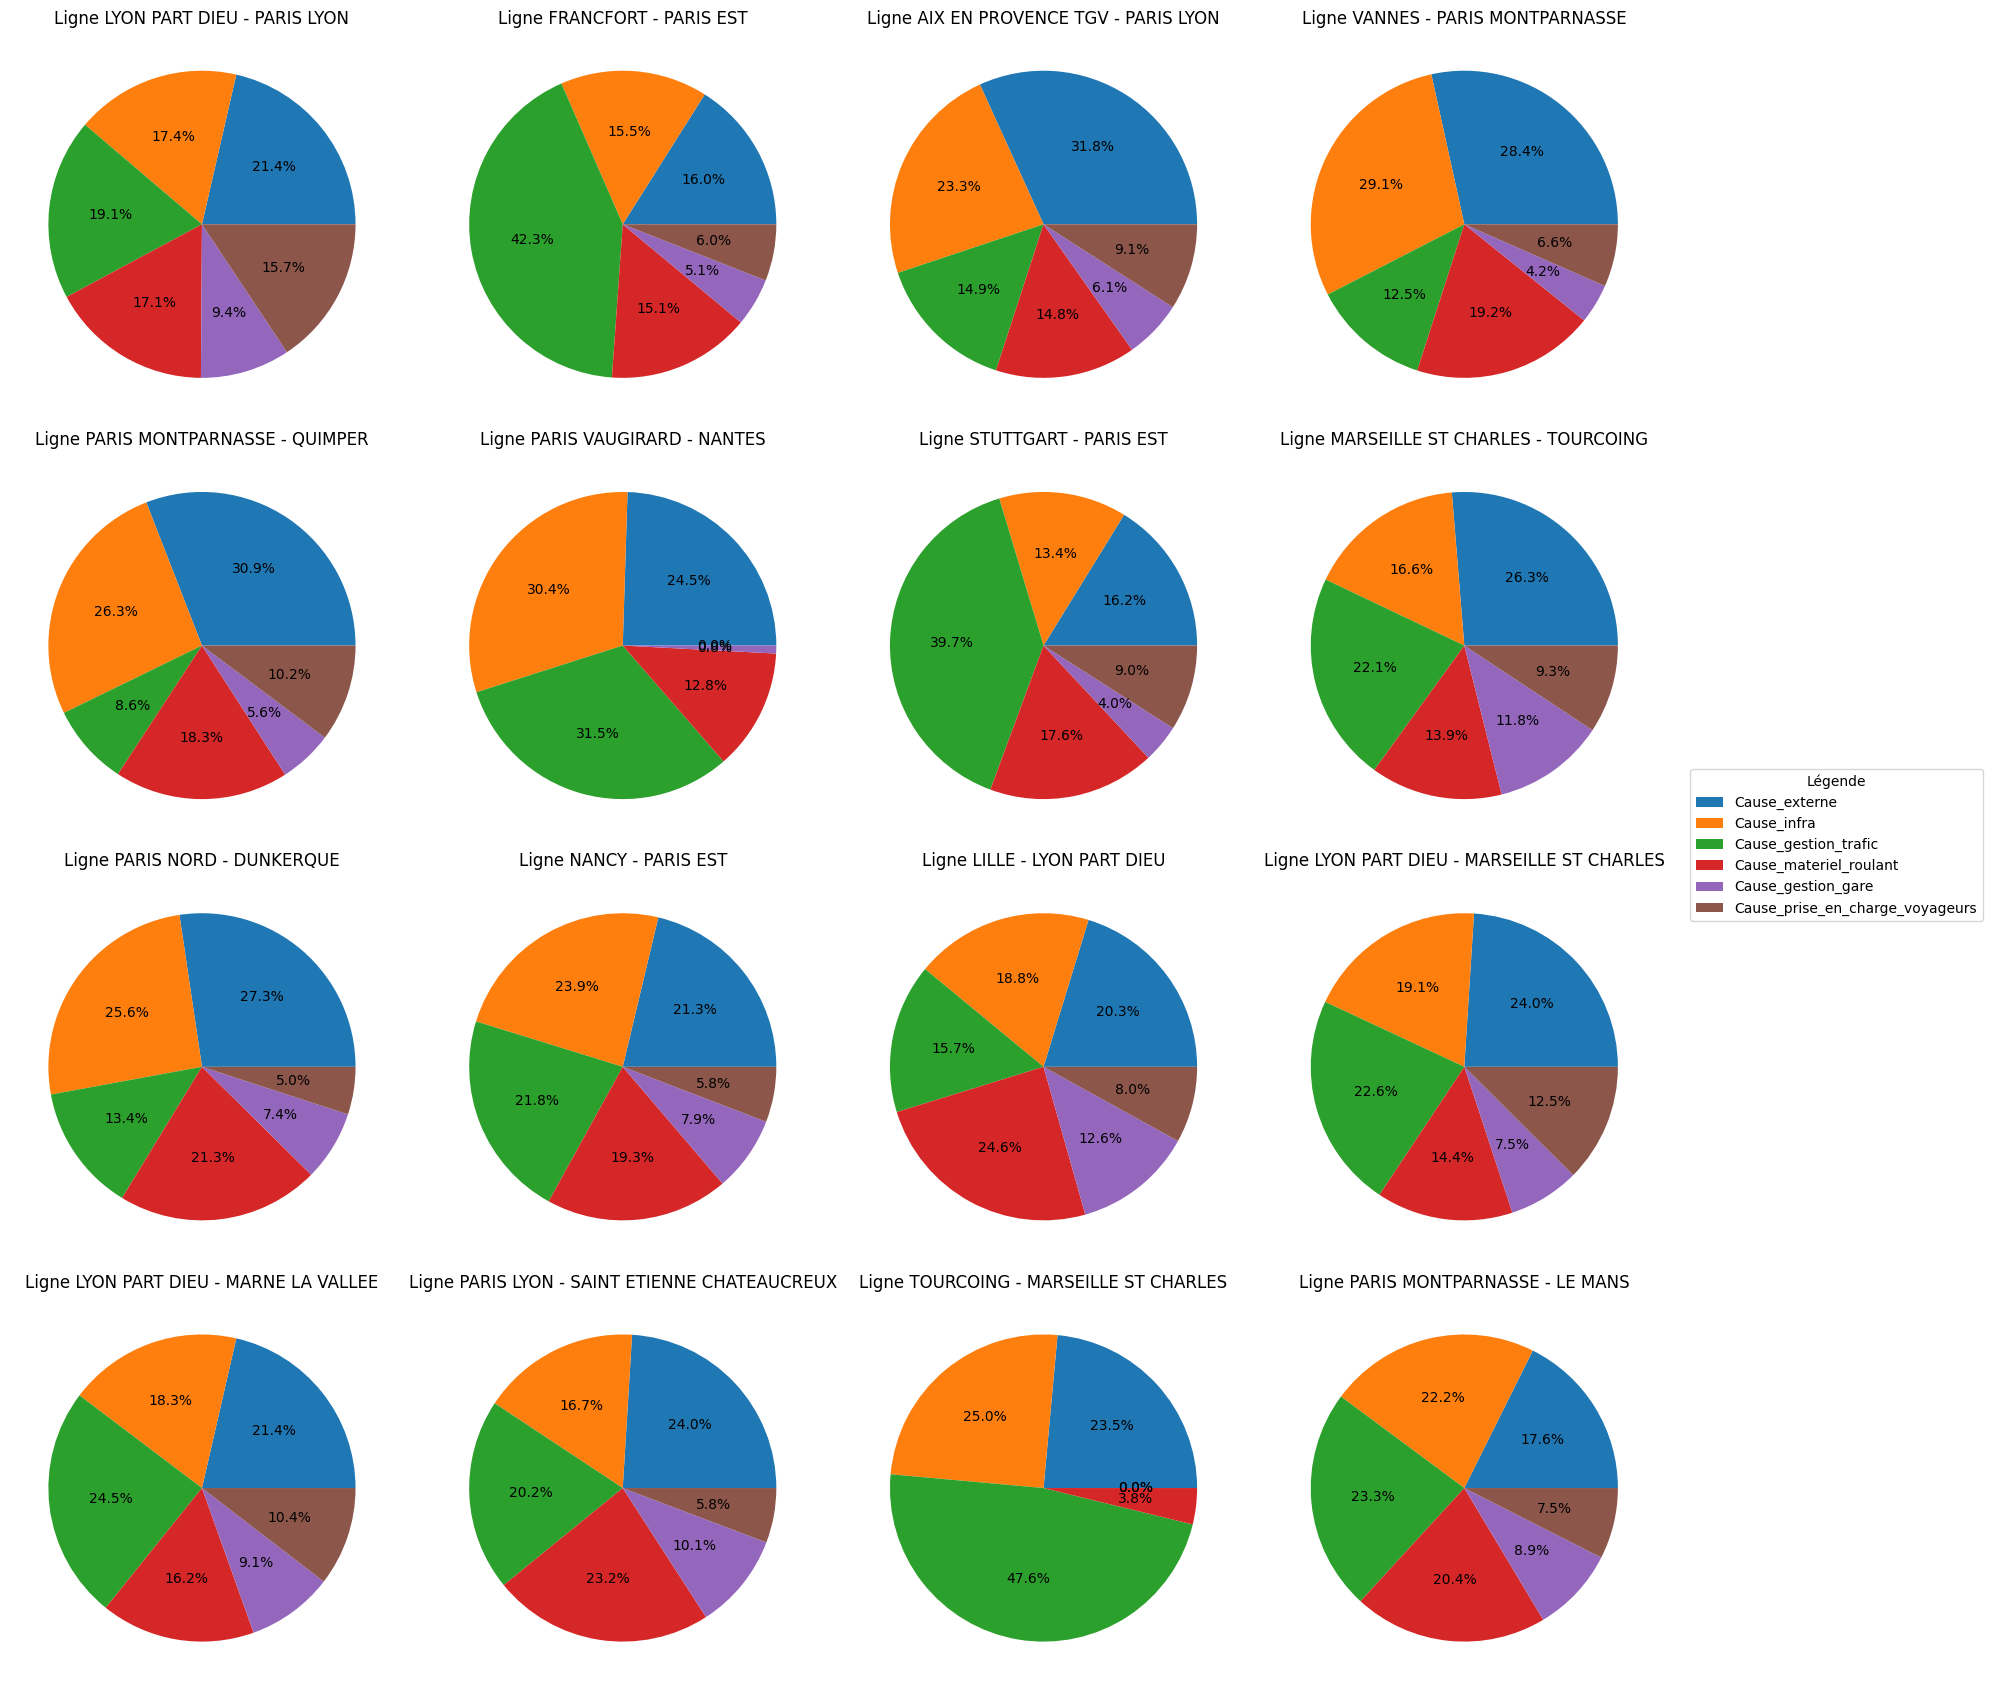

In [40]:
## Analyse par ligne et par cause
df_base['ligne'] = df_base['gare_depart']+ ' - ' + df_base['gare_arrivee']
df_base_groupby_ligne = df_base.groupby("ligne").agg(
    Cause_externe = ("prct_cause_externe",'mean'),
    Cause_infra = ("prct_cause_infra",'mean'),
    Cause_gestion_trafic = ("prct_cause_gestion_trafic",'mean'),
    Cause_materiel_roulant = ("prct_cause_materiel_roulant",'mean'),
    Cause_gestion_gare = ("prct_cause_gestion_gare",'mean'),
    Cause_prise_en_charge_voyageurs = ("prct_cause_prise_en_charge_voyageurs",'mean')
)


# Créez une liste pour stocker les 16 lignes sélectionnées
selected_lines = []

# Sélectionnez 16 lignes aléatoirement
for _ in range(16):
    selected_line = df_base_groupby_ligne.sample(1)
    selected_line = selected_line.reset_index()
    selected_lines.append(selected_line)

# Créez une grille de sous-graphiques de 4 lignes par 4 colonnes
fig, axes = plt.subplots(4, 4, figsize=(17, 17))


# Créez des graphiques pie pour chaque ligne sélectionnée
for i, selected_line in enumerate(selected_lines):
    # Réorganisez les données pour les rendre adaptées à un pie chart
    ligne_name = selected_line.ligne.values[0]
    selected_line = selected_line.drop(columns=['ligne']).T
    selected_line.columns = ['Pourcentage']

    # Créez un graphe pie
    ax = axes[i // 4, i % 4]
    wedges, texts, autotexts = ax.pie(selected_line['Pourcentage'], labels=[''] * len(selected_line.index), autopct='%1.1f%%')
    ax.set_title(f"Ligne {ligne_name}")

# Ajustez l'espacement entre les graphiques
plt.tight_layout()

# Créez une légende commune en dehors de la grille
legend_labels = ['Cause_externe', 'Cause_infra', 'Cause_gestion_trafic', 'Cause_materiel_roulant', 'Cause_gestion_gare', 'Cause_prise_en_charge_voyageurs']
fig.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Légende")


# Affichez les graphiques
plt.show()


## Analyse sur l'évolution temporelle du retard

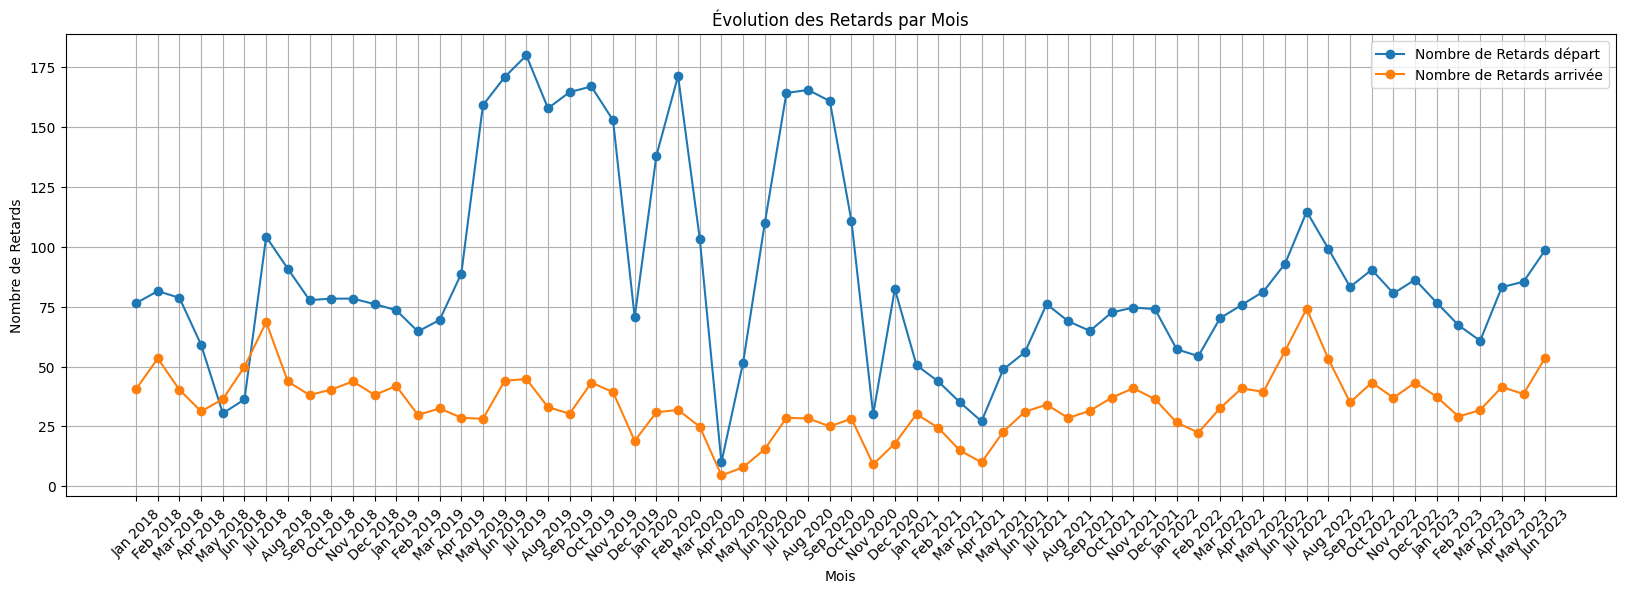

In [76]:
## Evolution train en retard au départ par mois 
df_month_group_by_month = df_base.groupby("date")[["nb_train_depart_retard", "nb_train_retard_arrivee"]].mean().reset_index()
df_month_group_by_month['date'] = pd.to_datetime(df_month_group_by_month['date'])
df_month_group_by_month['date'] = df_month_group_by_month['date'].dt.to_period('M')
df_month_group_by_month = df_month_group_by_month.set_index("date")
df_month_group_by_month.index = df_month_group_by_month.index.strftime('%b %Y')

plt.figure(figsize=(20, 6))
plt.plot(df_month_group_by_month.index, df_month_group_by_month["nb_train_depart_retard"], marker='o', label='Nombre de Retards départ')
plt.plot(df_month_group_by_month.index, df_month_group_by_month["nb_train_retard_arrivee"], marker='o', label='Nombre de Retards arrivée')
plt.title("Évolution des Retards par Mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de Retards")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


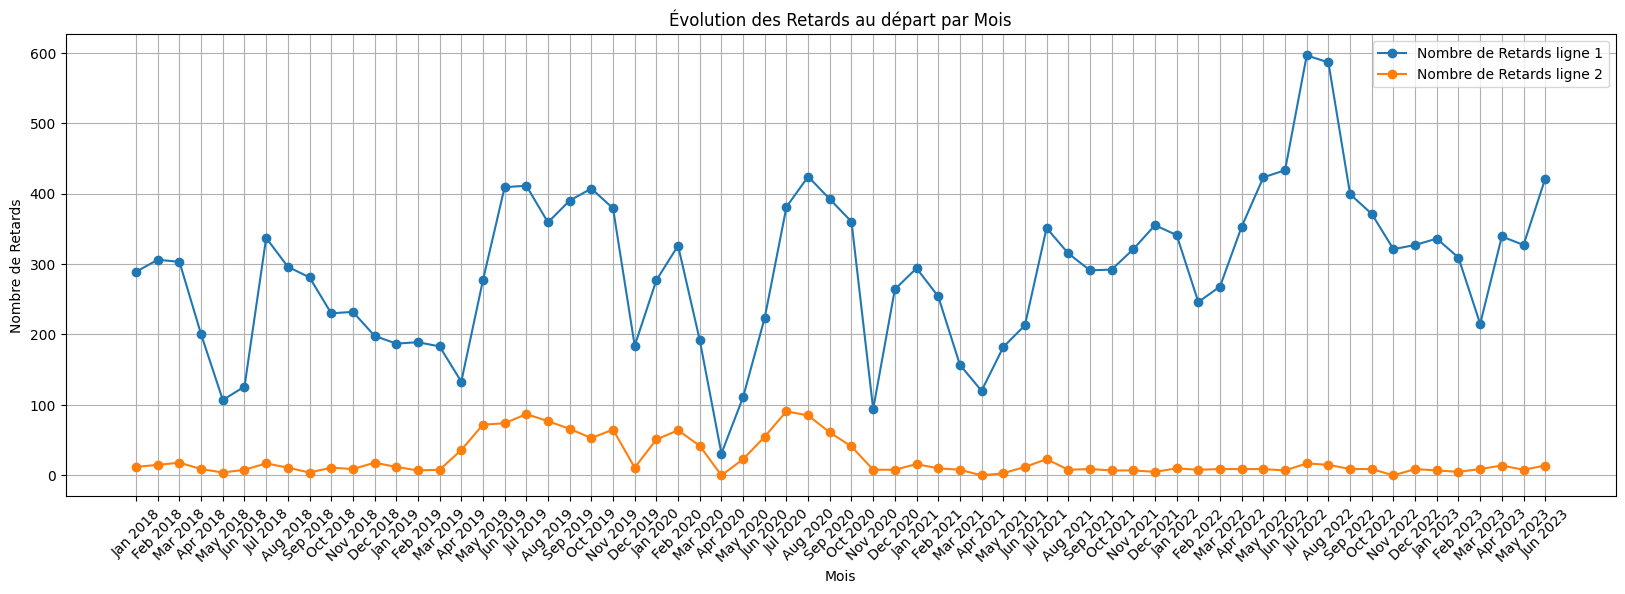

In [70]:
## Evolution Temps de retard par mois sur une ligne 
df_base['ligne'] = df_base['gare_depart']+ ' - ' + df_base['gare_arrivee']
ligne_selected_1 = "BORDEAUX ST JEAN - PARIS MONTPARNASSE"
ligne_selected_2 = "PARIS MONTPARNASSE - ST MALO"
df_ligne_selected_1 = df_base[df_base.ligne == ligne_selected_1][['date', 'nb_train_depart_retard']]
df_ligne_selected_1['date'] = pd.to_datetime(df_ligne_selected_1['date'])
df_ligne_selected_1['date'] = df_ligne_selected_1['date'].dt.to_period('M')

df_ligne_selected_1 = df_ligne_selected_1.set_index("date")
df_ligne_selected_1.index = df_ligne_selected_1.index.strftime('%b %Y')

df_ligne_selected_2 = df_base[df_base.ligne == ligne_selected_2][['date', 'nb_train_depart_retard']]
df_ligne_selected_2['date'] = pd.to_datetime(df_ligne_selected_2['date'])
df_ligne_selected_2['date'] = df_ligne_selected_2['date'].dt.to_period('M')

df_ligne_selected_2 = df_ligne_selected_2.set_index("date")
df_ligne_selected_2.index = df_ligne_selected_2.index.strftime('%b %Y')

# Créez un graphique pour l'évolution des retards par mois
plt.figure(figsize=(20, 6))
plt.plot(df_ligne_selected_1.index, df_ligne_selected_1["nb_train_depart_retard"], marker='o', label='Nombre de Retards ligne 1')
plt.plot(df_ligne_selected_2.index, df_ligne_selected_2["nb_train_depart_retard"], marker='o', label='Nombre de Retards ligne 2')
plt.title("Évolution des Retards au départ par Mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de Retards")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


## Correlation Analysis 

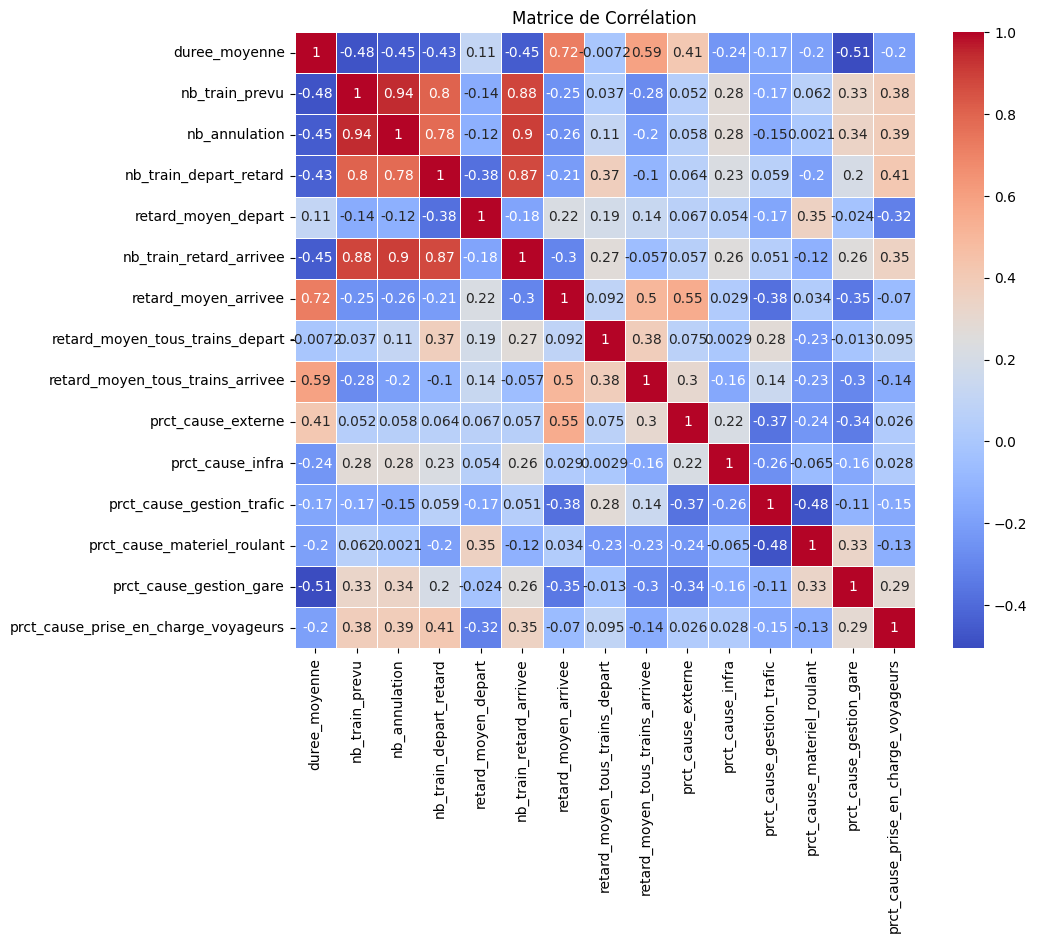

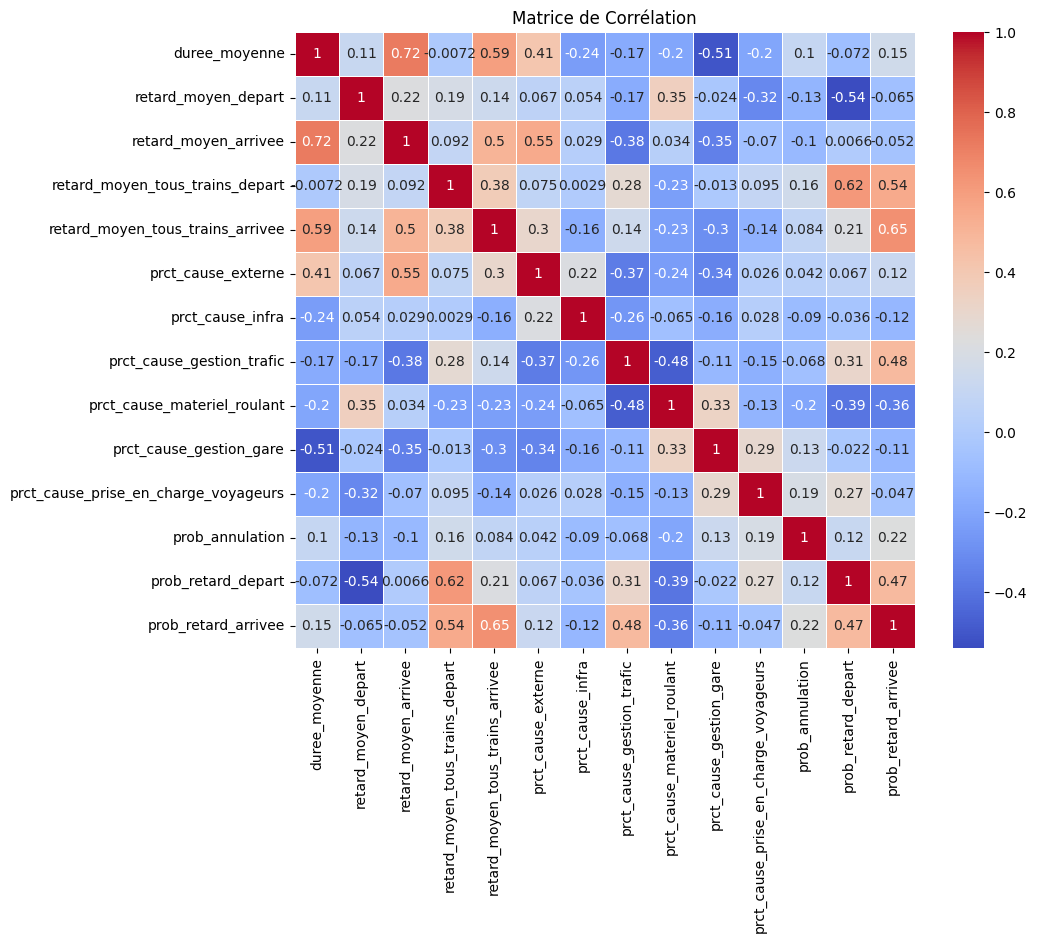

In [84]:
df_groupeby_ligne_bis = df_base.groupby("ligne").agg(
    duree_moyenne = ("duree_moyenne", "mean"),
    nb_train_prevu = ("nb_train_prevu", "mean"),
    nb_annulation = ("nb_annulation", "mean"),
    nb_train_depart_retard = ("nb_train_depart_retard", "mean"),
    retard_moyen_depart = ("retard_moyen_depart", "mean"),
    nb_train_retard_arrivee = ("nb_train_retard_arrivee", "mean"),
    retard_moyen_arrivee = ("retard_moyen_arrivee", "mean"),
    retard_moyen_tous_trains_depart = ("retard_moyen_tous_trains_depart", "mean"),
    retard_moyen_tous_trains_arrivee = ("retard_moyen_tous_trains_arrivee", "mean"),
    prct_cause_externe = ("prct_cause_externe", "mean"),
    prct_cause_infra = ("prct_cause_infra", "mean"),
    prct_cause_gestion_trafic = ("prct_cause_gestion_trafic", "mean"),
    prct_cause_materiel_roulant = ("prct_cause_materiel_roulant", "mean"),
    prct_cause_gestion_gare = ("prct_cause_gestion_gare", "mean"),
    prct_cause_prise_en_charge_voyageurs = ("prct_cause_prise_en_charge_voyageurs", "mean"),
)

df_corr_matrix = df_groupeby_ligne_bis.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

## Create dimension with no correlation 

df_groupeby_ligne_bis["prob_annulation"] = df_groupeby_ligne_bis["nb_annulation"] / df_groupeby_ligne_bis["nb_train_prevu"]
df_groupeby_ligne_bis["prob_retard_depart"] = df_groupeby_ligne_bis["nb_train_depart_retard"] / df_groupeby_ligne_bis["nb_train_prevu"]
df_groupeby_ligne_bis["prob_retard_arrivee"] = df_groupeby_ligne_bis["nb_train_retard_arrivee"] / df_groupeby_ligne_bis["nb_train_prevu"]

df_groupeby_ligne_bis.drop(columns=["nb_annulation", "nb_train_depart_retard", "nb_train_retard_arrivee","nb_train_prevu"], inplace=True)

df_corr_matrix = df_groupeby_ligne_bis.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()



